## Import Library

In [1011]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import pickle

## Data Loading

In [1012]:
data= pd.read_csv("CC GENERAL.csv")

In [1013]:
pd.set_option("display.max_columns", None)

In [1014]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [1015]:
data.shape

(8950, 18)

In [1016]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [1017]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [1018]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [1019]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

## Data Cleaning

In [1020]:
data.duplicated().sum()

0

In [1021]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [1022]:
data = data.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1023]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1024]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

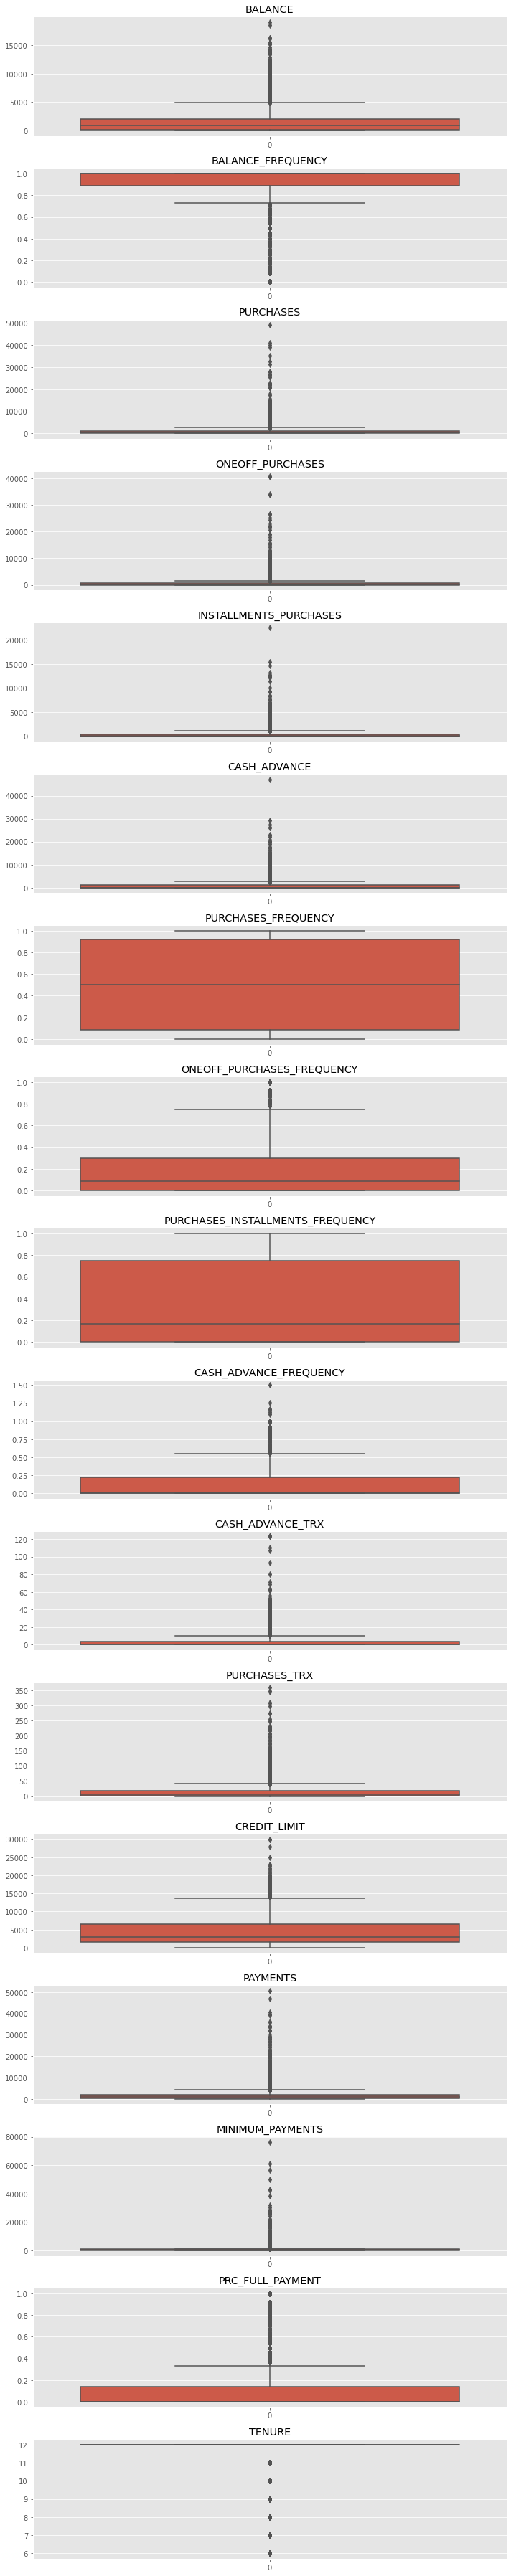

In [1025]:
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize=(10,50))

for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])
    
plt.tight_layout()

In [1026]:
# Handling outlier menggunakan IQR
Q1 = (data[['BALANCE','BALANCE_FREQUENCY','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]).quantile(0.25)
Q3 = (data[['BALANCE','BALANCE_FREQUENCY','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]).quantile(0.75)

In [1027]:
IQR= Q3-Q1

In [1028]:
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

In [1029]:
print('Nilai Maximum dari masing-masing Variable adalah: ', maximum)

Nilai Maximum dari masing-masing Variable adalah:  BALANCE                              4942.927215
BALANCE_FREQUENCY                       1.166666
PURCHASES                            2715.872500
ONEOFF_PURCHASES                     1443.512500
INSTALLMENTS_PURCHASES               1171.593750
CASH_ADVANCE                         2784.552848
PURCHASES_FREQUENCY                     2.166668
ONEOFF_PURCHASES_FREQUENCY              0.750000
PURCHASES_INSTALLMENTS_FREQUENCY        1.875000
CASH_ADVANCE_FREQUENCY                  0.555555
CASH_ADVANCE_TRX                       10.000000
PURCHASES_TRX                          41.000000
CREDIT_LIMIT                        13850.000000
PAYMENTS                             4177.921543
MINIMUM_PAYMENTS                     1715.497271
PRC_FULL_PAYMENT                        0.357143
TENURE                                 12.000000
dtype: float64


In [1030]:
print('Nilai Minimum dari masing-masing Variable adalah: ', minimum)

Nilai Minimum dari masing-masing Variable adalah:  BALANCE                            -2760.505265
BALANCE_FREQUENCY                      0.722223
PURCHASES                          -1566.107500
ONEOFF_PURCHASES                    -866.107500
INSTALLMENTS_PURCHASES              -702.956250
CASH_ADVANCE                       -1670.731709
PURCHASES_FREQUENCY                   -1.166668
ONEOFF_PURCHASES_FREQUENCY            -0.450000
PURCHASES_INSTALLMENTS_FREQUENCY      -1.125000
CASH_ADVANCE_FREQUENCY                -0.333333
CASH_ADVANCE_TRX                      -6.000000
PURCHASES_TRX                        -23.000000
CREDIT_LIMIT                       -5750.000000
PAYMENTS                           -1893.511060
MINIMUM_PAYMENTS                    -755.926115
PRC_FULL_PAYMENT                      -0.214286
TENURE                                12.000000
dtype: float64


In [1031]:
more_than = (data > maximum)
lower_than = (data < minimum)
data = data.mask(more_than, maximum, axis=1)
data = data.mask(lower_than, minimum, axis=1)

In [1032]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(data.describe())


Persebaran data setelah ditangani Outlier: 
           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean   1390.508973           0.931587   737.149330        354.358139   
std    1537.538479           0.110984   879.534788        511.823289   
min       0.000000           0.722223     0.000000          0.000000   
25%     128.281915           0.888889    39.635000          0.000000   
50%     873.385231           1.000000   361.280000         38.000000   
75%    2054.140036           1.000000  1110.130000        577.405000   
max    4942.927215           1.000000  2715.872500       1443.512500   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               295.546214    672.468924             0.490351   
std                396.181546    998.514970             0.401371   
min                  0.000000     

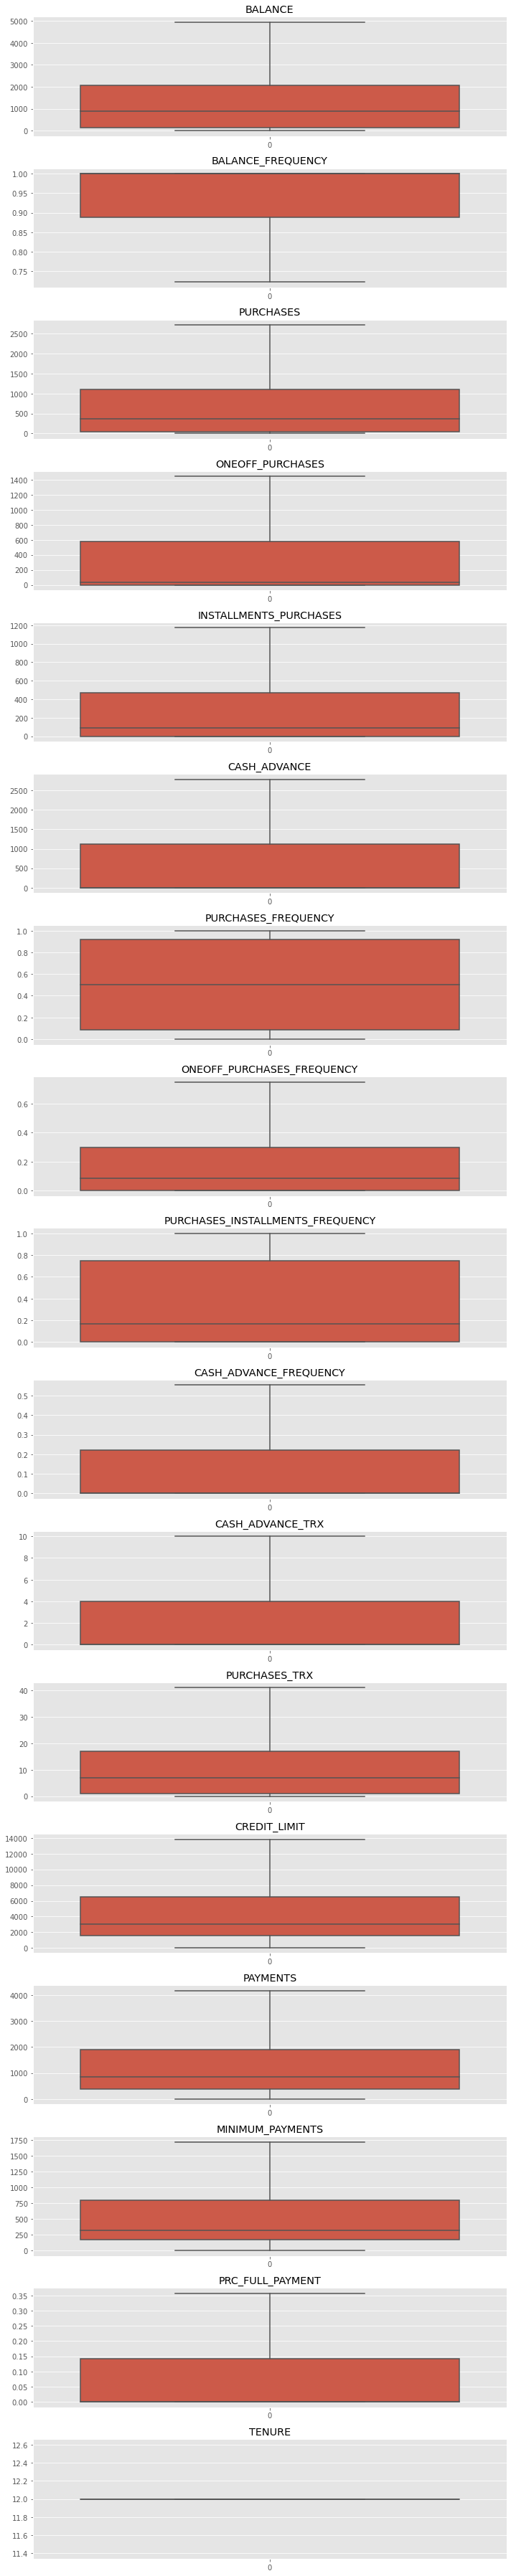

In [1033]:
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize=(10,50))

for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])
    
plt.tight_layout()

## Explorasi Data

## Data Preprocessing

In [1034]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.137221,1347.084165,556.752385,0.087223,12.0
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.788645,1272.806272,532.174180,0.138616,0.0
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.0
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1715.497271,0.357143,12.0


In [1035]:
# Standardize data
scaler = StandardScaler() 
data_train = scaler.fit_transform(data.values)
data_train.shape

(8950, 17)

In [1036]:
# Statistics of scaled data
data_train = pd.DataFrame(data_train, columns=data.columns)
data_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.0
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973961,0.0
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.0
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.0
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.0


In [1037]:
# melihat penggabungan cluster menggunakan Dendrogram
HC = linkage(data_train, method='ward')

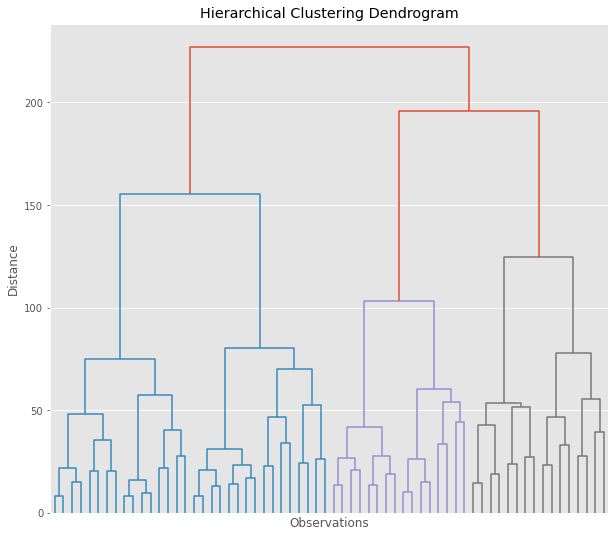

In [1038]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

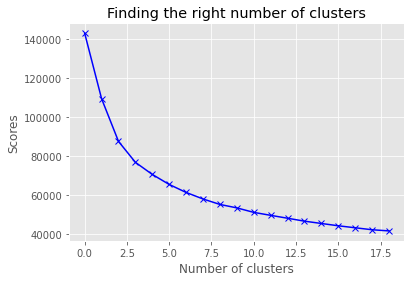

In [1039]:
#mencari jumlah cluster yang optimal menggunakan elbow method
scores_1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_train)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Scores') 
plt.show()

## Pendefinisian Model

In [1040]:
X= data_train.values

In [1041]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [1042]:
y_kmeans

array([3, 4, 0, ..., 1, 3, 3])

In [1043]:
kmeans_data= data_train.copy()
kmeans_data['KMeansSegment']= kmeans.labels_

In [1044]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.0,3
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973961,0.0,4
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.0,0
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.0,3
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.885891,0.616459,-0.507148,-0.692383,-0.011173,-0.673507,1.269843,-0.722749,1.179833,-0.730084,-0.697293,-0.431243,-1.010503,-0.802594,-0.954376,1.947356,0.0,1
8946,-0.891947,0.616459,-0.497051,-0.692383,0.011242,-0.673507,1.269843,-0.722749,1.179833,-0.730084,-0.697293,-0.431243,-1.010503,-0.841670,-0.459290,-0.629277,0.0,1
8947,-0.889205,-0.885352,-0.673973,-0.692383,-0.381529,-0.673507,0.854576,-0.722749,0.760469,-0.730084,-0.697293,-0.507924,-1.010503,-0.994561,-0.891363,1.174368,0.0,1
8948,-0.895671,-0.885352,-0.838160,-0.692383,-0.746029,-0.636891,-1.221758,-0.722749,-0.916995,0.235169,-0.112102,-0.891333,-1.158275,-1.017128,-0.941468,1.174368,0.0,3


In [1045]:
kmeans_data['Labels'] = kmeans_data['KMeansSegment'].map({0:'Middle Ground', 
                                                           1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 
                                                           3:'Frugal Credit Users',
                                                           4:'Very Frugal Credit Users'})
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.0,3,Frugal Credit Users
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973961,0.0,4,Very Frugal Credit Users
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.0,0,Middle Ground
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.0,3,Frugal Credit Users
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.0,0,Middle Ground


## Model Evaluation

In [1050]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.877821,-1.021875,-0.729687,-0.692383,-0.505216,-0.673507,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010503,-0.899859,-0.784078,-0.629277,0.0,3,Frugal Credit Users
1,1.178546,-0.202708,-0.838160,-0.692383,-0.746029,2.115343,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762757,2.165375,0.968887,0.973961,0.0,4,Very Frugal Credit Users
2,0.718487,0.616459,0.040957,0.818320,-0.746029,-0.673507,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910528,-0.569653,0.132544,-0.629277,0.0,0,Middle Ground
3,0.179623,-1.886552,0.866246,2.128108,-0.746029,-0.467401,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910528,-1.058417,-0.459290,-0.629277,0.0,3,Frugal Credit Users
4,-0.372561,0.616459,-0.819967,-0.661121,-0.746029,-0.673507,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951394,-0.525443,-0.586234,-0.629277,0.0,0,Middle Ground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.885891,0.616459,-0.507148,-0.692383,-0.011173,-0.673507,1.269843,-0.722749,1.179833,-0.730084,-0.697293,-0.431243,-1.010503,-0.802594,-0.954376,1.947356,0.0,1,High Credit Frequent Purchasers
8946,-0.891947,0.616459,-0.497051,-0.692383,0.011242,-0.673507,1.269843,-0.722749,1.179833,-0.730084,-0.697293,-0.431243,-1.010503,-0.841670,-0.459290,-0.629277,0.0,1,High Credit Frequent Purchasers
8947,-0.889205,-0.885352,-0.673973,-0.692383,-0.381529,-0.673507,0.854576,-0.722749,0.760469,-0.730084,-0.697293,-0.507924,-1.010503,-0.994561,-0.891363,1.174368,0.0,1,High Credit Frequent Purchasers
8948,-0.895671,-0.885352,-0.838160,-0.692383,-0.746029,-0.636891,-1.221758,-0.722749,-0.916995,0.235169,-0.112102,-0.891333,-1.158275,-1.017128,-0.941468,1.174368,0.0,3,Frugal Credit Users


In [1051]:
pca = PCA(n_components=2)
PrincipalComponents = pca.fit_transform(data_train)
PrincipalComponents

array([[-1.64967072, -2.4134269 ],
       [-2.20895663,  2.30556553],
       [ 1.1675974 ,  0.29622985],
       ...,
       [-0.12305029, -2.78739718],
       [-2.08861596, -2.28574425],
       [ 0.51793149, -0.71549169]])

In [1052]:
data_pca=pd.DataFrame(data=PrincipalComponents, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.649671,-2.413427
1,-2.208957,2.305566
2,1.167597,0.296230
3,-0.491749,-0.561124
4,-1.666534,-1.621697


In [1053]:
data_pca = pd.concat([data_pca,kmeans_data.KMeansSegment], axis = 1)
data_pca.head(10)

,pca1,pca2,KMeansSegment
0,-1.649671,-2.413427,3
1,-2.208957,2.305566,4
2,1.167597,0.296230,0
3,-0.491749,-0.561124,3
4,-1.666534,-1.621697,0
5,0.998419,0.176448,1
6,5.768893,1.035828,2
7,0.746967,-1.014461,1
8,-0.024634,-0.724391,0
9,0.054246,-0.963959,3


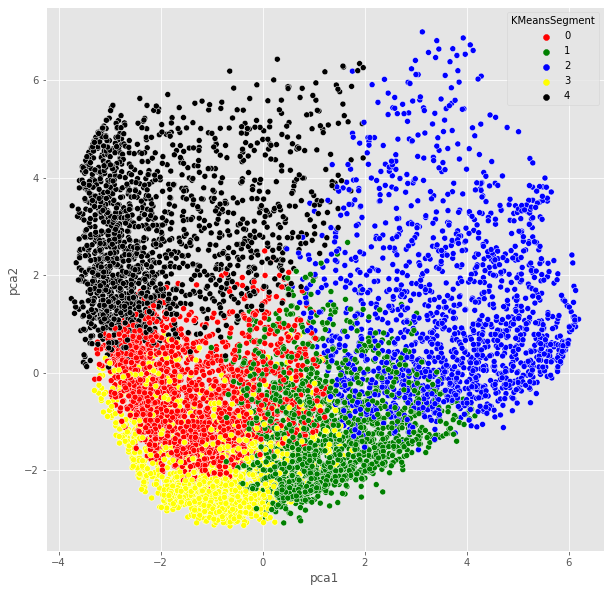

In [1054]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "KMeansSegment", data = data_pca, palette =['red','green','blue','yellow','black'])
plt.show()

## Model Infenrence

In [1055]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1057]:
balance=float(input('Balance :'))
balance_freq=float(input('Balance Frequency :'))
purchases=float(input('Purchases :'))
oneoff_purchases=float(input('One Off Purchases :'))
installments_purchases=float(input('Installments Purchases :'))
cash_advance=float(input('Cash Advance :'))
purchases_freq=float(input('Purchases Frequency:'))
oneoff_purchases_freq=float(input('One Off Purchases Frequency:'))
purchases_installments=float(input('Purchases Installments Frequency:'))
cash_adv_freq=float(input('Cash Advance Frequency :'))
cash_adv_trx=float(input('Cash Advance Transaction :'))
purchase_trx=float(input('Purchase Transaction :'))
credit_limit=float(input('Credit Limit :'))
payments=float(input('Payments :'))
min_payments=float(input('Minimum Payments :'))
prc_full_pay=float(input('Price Full Payment :'))
tenure=float(input('Tenure :'))

feature=[balance,balance_freq,purchases, oneoff_purchases, installments_purchases,cash_advance,purchases_freq,
         oneoff_purchases_freq,purchases_installments,cash_adv_freq,cash_adv_trx,purchase_trx,credit_limit,payments,min_payments,
         prc_full_pay,tenure]

feature=scaler.transform([feature])

feature.reshape(17,)

print(feature)

predict=kmeans.predict(feature)

print('cluster :', predict)

Balance :3202.467416
Balance Frequency :0.909091
Purchases :0.00
One Off Purchases :0.0000
Installments Purchases :0.0
Cash Advance :2784.552848	
Purchases Frequency:0.000000
One Off Purchases Frequency:0.000000
Purchases Installments Frequency:0.000000
Cash Advance Frequency :0.250000
Cash Advance Transaction :4
Purchase Transaction :0
Credit Limit :7000.0
Payments :4103.032597
Minimum Payments :1072.340217
Price Full Payment :0.222222
Tenure :12
[[ 1.1785459  -0.2027079  -0.83815959 -0.69238338 -0.7460285   2.11534328
  -1.22175806 -0.72274878 -0.91699519  0.71779181  0.47308936 -0.89133295
   0.76275656  2.16537463  0.96888699  0.9739614   0.        ]]
cluster : [4]


## Kesimpulan